# Approach
- 类似234，利用876和206找到中间节点并将中间节点到最后一个节点这一段的linked list翻转

- 定义两个指针p1和p2，一开始分别指向两个linked list的头节点，记录p1Next和p2Next分别表示p1和p2的下一个节点，进行两步操作：(1) p1指向p2 (2) p2指向p1Next！然后p1和p2分别更新为p1Next和p2Next，重复上述操作！

- 关键点在于上述操作什么时候停止！如果原来的linked list中有奇数个节点，那么当p1和p2都是中间节点，即`p1 == p2`时停止！如果有偶数个节点，那么当p1和p2是中间两个节点，即`p1.next == p2`时停止！  

- 具体动画如下图所示：
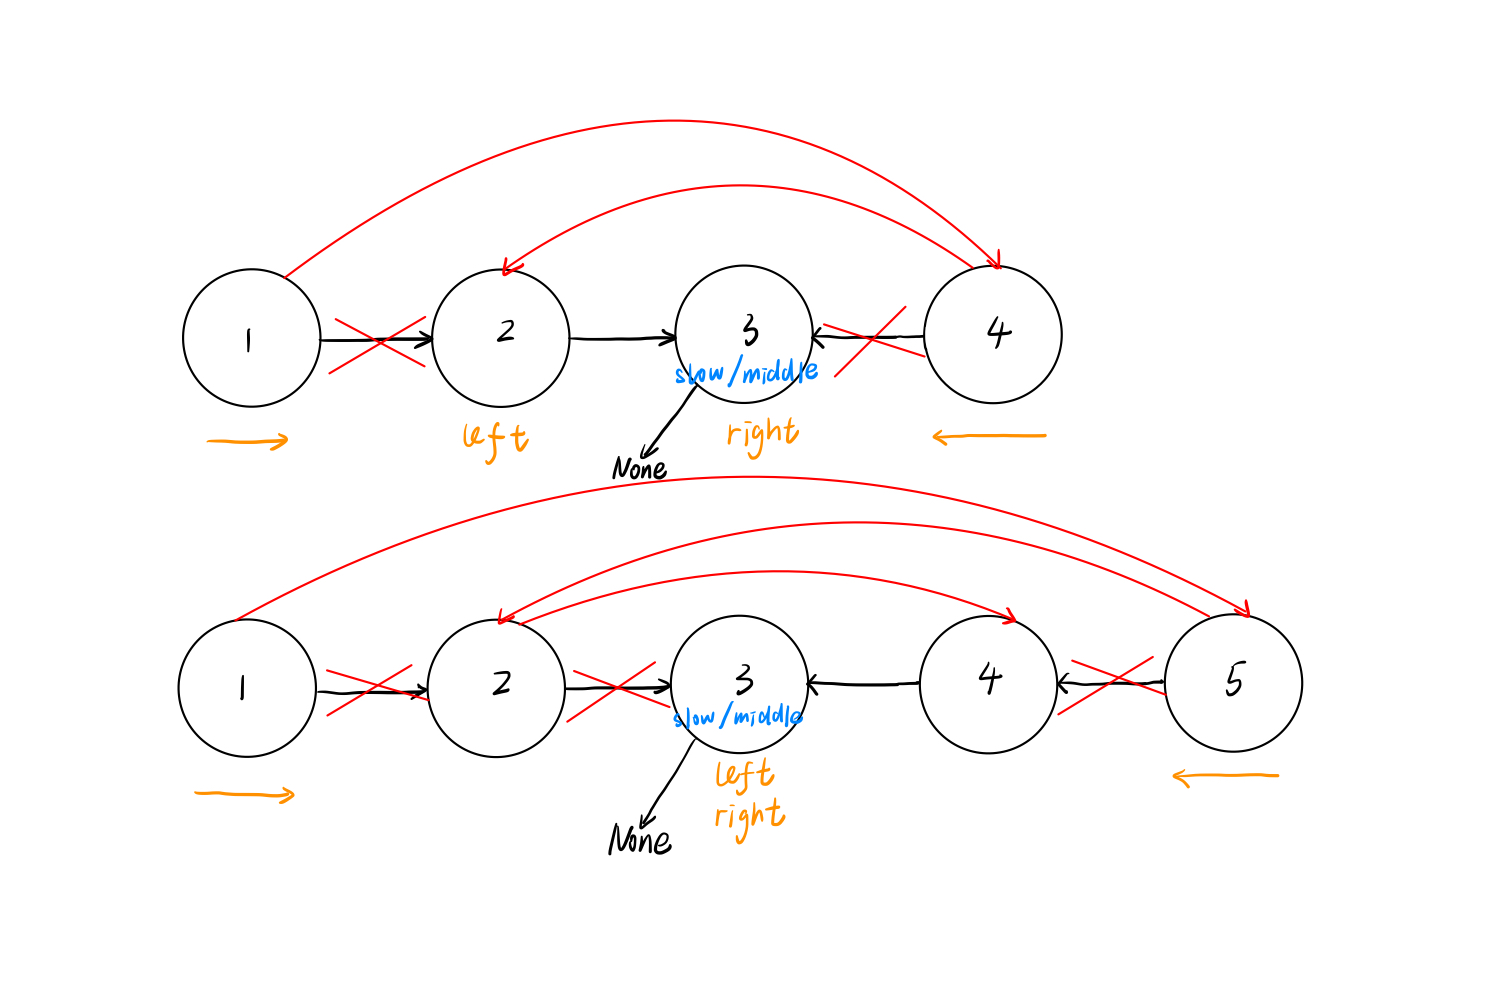
  
# Code

In [ ]:
# Time: O(n), Space: O(1)

# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

from typing import Optional

class Solution:
    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        # 找到中间节点
        slow, fast = head, head
        while fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next
        
        # 反转节点
        prev, curr = None, slow
        while curr != None:
            currNext = curr.next
            curr.next = prev
            prev, curr = curr, currNext
        
        # 合并节点
        p1, p2 = head, prev
        while p1 != p2 and p1.next != p2:
            p1Next = p1.next
            p2Next = p2.next

            p1.next = p2
            p2.next = p1Next

            p1, p2 = p1Next, p2Next